In [17]:
import numpy as np
import os
import sys 
import pandas as pd
import matplotlib.pyplot as plt
import pickle 

In [36]:
# indexing results 
# for stat in range(1)
iters = []
for res in range(4):
    file_path = 'results/indexing/iteration_results_num'+str(res)+'.txt'
    d = {}
    with open(file_path) as f:
        for line in f:
           (key, val) = line.split(':')
           d[key] = float(val[:-2])
    iters.append(d)

In [42]:
mean_dict = {}
for key in iters[0].keys():
    stats = [iters[j].get(key) for j in range(4)]
    mean_dict[key] = np.round(np.mean(stats), 4)

In [43]:
mean_dict

{'indexing took': 12.7902,
 'meta reading took': 13.3966,
 'log fitting took': 1.1808,
 'log filtered set size (our)': 3859.0,
 'log filtering TP (our)': 687.25,
 'log filtering took (our)': 0.0309,
 'log filtered set size (Scope)': 1094.0,
 'log filtering TP (Scope)': 522.5,
 'log filtering took (Scope)': 0.0131,
 'cnn fitting took': 412.7595,
 'cnn filtered set size (Our)': 5319.5,
 'cnn filtering TP (Our)': 763.5,
 'cnn filtering took (our)': 41.5417,
 'cnn filtered set size (Scope)': 2930.25,
 'cnn filtering TP (Scope)': 440.75,
 'cnn filtering took (Scope)': 213.4412}

In [45]:
df = pd.DataFrame(columns=['Model', 'Time', 'Size of Filtered Set', 'TP'])
df.loc[0] = ['Log (our)', (12.7902+13.3966+1.1808+0.0309), 3859.0, 688]
df.loc[1] = ['Log (Scope)', (12.7902+13.3966+1.1808+0.0131), 1094.0, 523]
df.loc[2] = ['CNN (our)', (12.7902+13.3966+412.7595+41.5417), 5320, 764]
df.loc[4] = ['CNN (Scope)', (12.7902+13.3966+412.7595+213.4412), 2931, 441]


In [53]:
index = ['Log (our)', 'Log (Scope)', 'CNN (our)',  'CNN (Scope)']
time = [(12.7902+13.3966+1.1808+0.0309), (12.7902+13.3966+1.1808+0.0131), (12.7902+13.3966+412.7595+41.5417), (12.7902+13.3966+412.7595+213.4412)]
size_filtered = [3859-688, 1094-523, 5320-764, 2931-441]
tp = [688, 523, 764, 441]
poolt = pd.DataFrame({'time': time, 'tp':tp, 'other': size_filtered}, index=index)
poolt.head()

,time,other,tp
Log (our),27.3985,3171,688
Log (Scope),27.3807,571,523
CNN (our),480.4880,4556,764
CNN (Scope),652.3875,2490,441


<Axes: title={'center': ' Time consumption of Filtering methods'}, xlabel='Filtering Method', ylabel='Seconds'>

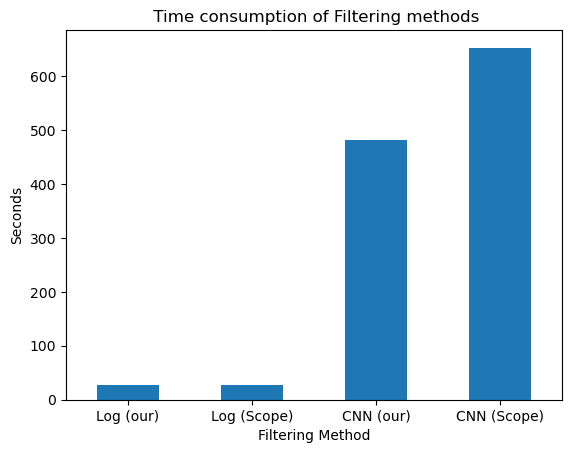

In [54]:
poolt.time.plot.bar(rot=0, xlabel='Filtering Method', ylabel='Seconds', title =' Time consumption of Filtering methods')

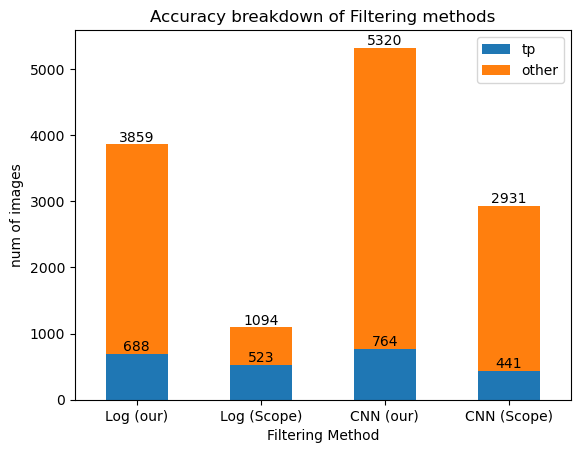

In [56]:
ax = poolt[['tp', 'other']].plot.bar(rot=0,stacked=True,  xlabel='Filtering Method', ylabel='num of images', title ='Accuracy breakdown of Filtering methods')
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
index = ['YOLOv8 (Naive/Ground Truth)', 'Yolov8 (Our filtering)', 'Tiny (Our filtering)']
time = [(3.2*60), (35.7), 53079.0]
estimate = [  , 62438, ] # indx 53079.0
tp = [688, 523, 764, 441]
poolt = pd.DataFrame({'time': time, 'tp':tp, 'other': size_filtered}, index=index)
poolt.head()